In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# sys.path.append("../Functions")
from calcium_constants import *

from numpy.polynomial import Polynomial

# %matplotlib qt
# %matplotlib inline
%load_ext watermark
%watermark

Last updated: 2025-03-25T14:35:23.027048+01:00

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.15.0

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 23.6.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit



In [20]:
from matplotlib.pyplot import cm
cm = plt.get_cmap('turbo')
plt.rcParams['figure.figsize'] = [11.7, 8.3]
plt.rcParams.update({'font.size': 16})

In [31]:
def pot_4(x,p,a,b,c):
    return p*x + a*x**2 + b*x**3 + c*x**4
def pot_3(x,p,a,b):
    return p*x + a*x**2 + b*x**3
def pot_2(x,p,a):
    return p*x + a*x**2
def pot_1(x,p):
    return p*x

In [14]:
helper = lambda x, p, a, b, c=0 : pot_4(x,p,a,b,c)

In [82]:
x = np.linspace(-200*1e-6,200*1e-6,100001)
p = 0
a = 0.5 * (422500*2*np.pi)**2 *m_Ca/C_e
b = 1/3*1e11 * m_Ca/C_e
c = 1/4*1e19 * m_Ca/C_e

V4 = pot_3(x,p,a,b)
V44 = helper(x,p,a,b)

print(V44 - V4)

print(f'   a    ,    b    ,    c')
print(f'{a:.3e},{b:.3e},{c:.3e}')

[0. 0. 0. ... 0. 0. 0.]
   a    ,    b    ,    c
1.464e+06,1.385e+04,1.038e+12


In [86]:
print(f'{1.464e+06**2:.3e}')

2.143e+12


---------
0
0.000e+00,1.464e+06,1.000e+08,1.000e+00
50000 0.0
---------
1
0.000e+00,1.464e+06,2.000e+08,1.000e+00
50000 0.0
---------
2
0.000e+00,1.464e+06,5.000e+08,1.000e+00
50000 0.0
---------
3
0.000e+00,1.464e+06,1.000e+09,1.000e+00
50000 0.0
---------
4
0.000e+00,1.464e+06,2.000e+09,1.000e+00
50000 0.0
---------
5
0.000e+00,1.464e+06,5.000e+09,1.000e+00
50000 0.0
---------
6
0.000e+00,1.464e+06,1.000e+10,1.000e+00
0 -0.00019999999999999998


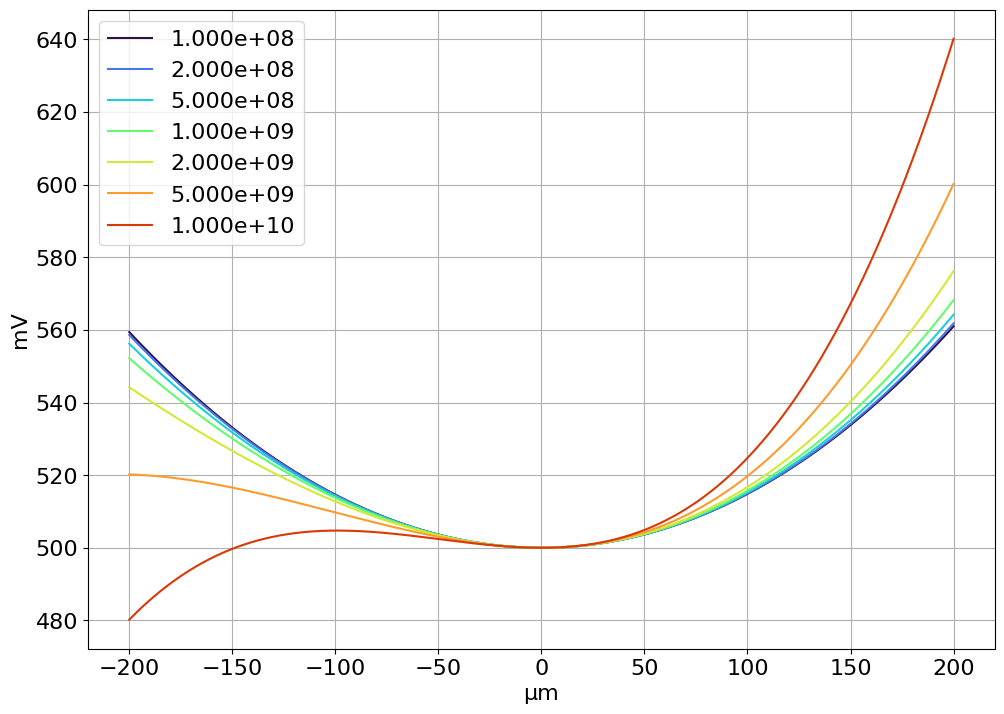

In [88]:
b = np.array([1e3, 2e3, 5e3, 1e4, 2e4, 5e4, 1e5])*1e5 # np.linspace(0,10000,11)*m_Ca/C_e/3

fig, ax = plt.subplots(1,num=1,clear=True)

for i,j in enumerate(b):
    print('---------')
    print(i)
    mon_pot = pot_4(x,p,a,j,c)
    print(f'{p:.3e},{a:.3e},{j:.3e},{d:.3e}')
    ax.plot(x*1e6,mon_pot*1e3 + 500,
            color=cm(i/len(b)),
            label=f'{j:.3e}')

    print(np.argmin(mon_pot), x[np.argmin(mon_pot)])

ax.grid()
ax.set_xlabel('µm')
ax.set_ylabel('mV')
ax.legend()